In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

base_path = 'F:\Study\weiboPredict\data'

print('读取源微博...')
origin = pd.read_csv(base_path + '\sample_origin_filtered.csv',
                     index_col='w_id',
                     sep='\001',
                     encoding='utf-8',
                     quoting=3)
print('读取转发...')
repo = pd.read_csv(base_path + '\\sample_repo_filtered.csv',
                   sep='\001',
                   encoding='utf-8',
                   quoting=3).fillna(value='', axis=1)

Populating the interactive namespace from numpy and matplotlib


读取源微博...


读取转发...


In [2]:
origin.head()

,author_id,time,content,repo_num_1w,mean_depth,90p_depth,max_depth,label_with_depth,label,label_even
w_id,,,,,,,,,,
3794305741726764,2724513,20:47:26,看到这条微博的人，羊年都会走大运！,896.0,1.492734,2,6,3,3,3.0
3794545218812248,7460165,12:39:02,2015你最想获得下面那一项?,117.0,1.000000,1,2,0,0,0.0
3794726233244929,7387806,00:38:19,从剧组偷了个闲出来认真的看过沙果“贱”入佳境了，幽默精彩，点赞支持👍，票房小黑马马力十足🐎祝...,1197.0,1.891433,2,3,4,4,4.0
3795261795455671,8189779,12:06:27,我操你们妈了隔壁[呵呵],214.0,1.734043,3,5,1,0,1.0
3795438593411753,7298946,23:48:59,[讨论]周杰伦的歌曲和正能量影响着几代人！当然还有现在爆红的00后组合TFBOYS的队长王俊...,978.0,1.555427,2,4,4,3,3.0


In [3]:
repo.head()

,w_id,from_id,repo_id,arrive_wt,arrive_tt,repo_tt,content
0,3903741306239294,6077791,7771152,71,99,66580.931921,
1,3903741306239294,6077791,8259395,86,118,66600.133343,
2,3903741306239294,6077791,1099401,98,134,66616.134528,同问！
3,3903741306239294,6077791,5279587,119,150,66632.135714,
4,3903741306239294,6077791,4099918,122,160,66641.736425,同问


In [4]:
index_from,counts_from = np.unique(repo.from_id.values,return_counts=True)
print('被转发过的用户量：',index_from.shape[0])
index_repo,counts_repo = np.unique(repo.repo_id.values,return_counts=True)
print('转发过的用户量：',index_repo.shape[0])
user_list = np.union1d(index_from,index_repo)
print('用户总量：',user_list.shape[0])
user_never_repoted= np.setdiff1d(index_repo,index_from)
print('未被转发过的用户量：',user_never_repoted.shape[0])
user_never_repo = np.setdiff1d(index_from,index_repo)
print('从不转发的用户量：',user_never_repo.shape[0])

被转发过的用户量： 434410


转发过的用户量： 6833658


用户总量： 6855342


未被转发过的用户量： 6420932


从不转发的用户量： 21684


In [6]:
grouped_repo = repo.groupby(by=['w_id'], sort=False)

In [7]:
def first_k_repos(df,k):
    return df.iloc[:k]

In [8]:
first_k = grouped_repo.apply(first_k_repos,k=75)
first_k

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>w_id</th>
      <th>from_id</th>
      <th>repo_id</th>
      <th>arrive_wt</th>
      <th>arrive_tt</th>
      <th>repo_tt</th>
      <th>content</th>
    </tr>
    <tr>
      <th>w_id</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="30" valign="top">3903741306239294</th>
      <th>0</th>
      <td>3903741306239294</td>
      <td>6077791</td>
      <td>7771152</td>
      <td>71</td>
      <td>99</td>
      <td>66580.931921</td>
      <td></td>
    </tr>
    <tr>
      <th>1</th>
      <td>3903741306239294</td>
      <td>6077791</td>
      <td>8259395</td>
      <td>86</td>
      <td>118</td>
      <td>66600.133343</td>
      <td></td>
    </tr>
    <tr>
      <th>2</th>
      <td>3903741306239294</td>
      <td>6077791</td>
      <td>1099401</td>
      <td>98</td>
      <td>134</td>
      <td>66616.134528</td>
      <td>同问！</td>
    </tr>
    <tr>
      <th>3</th>
      <td>3903741306239294</td>
      <td>6077791</td>
      <td>5279587</td>
      <td>119</td>
      <td>150</td>
      <td>66632.135714</td>
      <td></td>
    </tr>
    <tr>
      <th>4</th>
      <td>3903741306239294</td>
      <td>6077791</td>
      <td>4099918</td>
      <td>122</td>
      <td>160</td>
      <td>66641.736425</td>
      <td>同问</td>
    </tr>
    <tr>
      <th>5</th>
      <td>3903741306239294</td>
      <td>6077791</td>
      <td>7846530</td>
      <td>148</td>
      <td>198</td>
      <td>66680.139270</td>
      <td>行了。中国最大的问题，已经摆在这里了。都看看吧。</td>
    </tr>
    <tr>
      <th>6</th>
      <td>3903741306239294</td>
      <td>6077791</td>
      <td>7661648</td>
      <td>152</td>
      <td>204</td>
      <td>66686.539744</td>
      <td></td>
    </tr>
    <tr>
      <th>7</th>
      <td>3903741306239294</td>
      <td>8259395</td>
      <td>7665074</td>
      <td>165</td>
      <td>227</td>
      <td>66708.941403</td>
      <td></td>
    </tr>
    <tr>
      <th>8</th>
      <td>3903741306239294</td>
      <td>6077791</td>
      <td>3360286</td>
      <td>174</td>
      <td>246</td>
      <td>66728.142825</td>
      <td></td>
    </tr>
    <tr>
      <th>9</th>
      <td>3903741306239294</td>
      <td>6077791</td>
      <td>5739703</td>
      <td>190</td>
      <td>259</td>
      <td>66740.943774</td>
      <td>[话筒][话筒][话筒]</td>
    </tr>
    <tr>
      <th>10</th>
      <td>3903741306239294</td>
      <td>6077791</td>
      <td>6893466</td>
      <td>229</td>
      <td>339</td>
      <td>66820.949700</td>
      <td>刚刚的新帖如图，后附视频标题可知头条本意。 http://t.cn/RUckHr0</td>
    </tr>
    <tr>
      <th>11</th>
      <td>3903741306239294</td>
      <td>6077791</td>
      <td>6815328</td>
      <td>279</td>
      <td>393</td>
      <td>66875.353730</td>
      <td></td>
    </tr>
    <tr>
      <th>12</th>
      <td>3903741306239294</td>
      <td>7846530</td>
      <td>8330227</td>
      <td>296</td>
      <td>512</td>
      <td>66993.762501</td>
      <td></td>
    </tr>
    <tr>
      <th>13</th>
      <td>3903741306239294</td>
      <td>1099401</td>
      <td>8152309</td>
      <td>344</td>
      <td>569</td>
      <td>67051.366768</td>
      <td>[围观]？</td>
    </tr>
    <tr>
      <th>14</th>
      <td>3903741306239294</td>
      <td>1099401</td>
      <td>3355550</td>
      <td>348</td>
      <td>579</td>
      <td>67060.967479</td>
      <td></td>
    </tr>
    <tr>
      <th>15</th>
      <td>3903741306239294</td>
      <td>7846530</td>
      <td>8339459</td>
      <td>349</td>
      <td>582</td>
      <td>67064.167716</td>
      <td>媒体不要发表带色彩的评论</td>
    </tr>
    <tr>
      <th>16</th>
      <td>3903741306239294</td>
      <td>8259395</td>
      <td>8329229</td>
      <td>351</td>
      <td>585</td>
      <td>67067.367953</td>
      <td></td>
    </tr>
    <tr>
      <th>17</th>


In [9]:
first_k.to_csv(base_path + '\\first_75_repo.csv',
                        columns=['w_id','from_id','repo_id','arrive_wt','arrive_tt','repo_tt','content'],
                        sep='\001',
                        index=False,
                        encoding='utf-8',
                        quoting=3)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
base_path = 'F:\Study\weiboPredict\data'
first_k = pd.read_csv(base_path + '\\first_75_repo.csv',
                        sep='\001',
                        encoding='utf-8',
                        quoting=3).fillna(value='', axis=1)

Populating the interactive namespace from numpy and matplotlib


In [12]:
first_k.head()

,w_id,from_id,repo_id,arrive_wt,arrive_tt,repo_tt,content
0,3903741306239294,6077791,7771152,71,99,66580.931921,
1,3903741306239294,6077791,8259395,86,118,66600.133343,
2,3903741306239294,6077791,1099401,98,134,66616.134528,同问！
3,3903741306239294,6077791,5279587,119,150,66632.135714,
4,3903741306239294,6077791,4099918,122,160,66641.736425,同问


In [13]:
index_from,counts_from = np.unique(first_k.from_id.values,return_counts=True)

index_repo,counts_repo = np.unique(first_k.repo_id.values,return_counts=True)
 
user_list = np.union1d(index_from,index_repo)
 
only_post_users = np.setdiff1d(index_from,index_repo)
border_users = np.setdiff1d(index_repo,index_from)
print('from user:',index_from.shape[0])
print('repo user:',index_repo.shape[0])
print('all user:',user_list.shape[0])
print('only post:',only_post_users.shape[0])
print('border user:',border_users.shape[0])

from user: 82768
repo user: 1302501
all user: 1317015
only post: 14514
border user: 1234247


In [36]:
def extract_feature_rn(feature_rn,origin,first_k):
    import networkx as nx
    repos = first_k[first_k['w_id']==feature_rn.name]
    g = nx.from_pandas_dataframe(repos,source='from_id',target='repo_id',create_using=nx.DiGraph())

77.0

In [51]:
origin.loc[3795438593411753]

author_id                                                     7298946
time                                                         23:48:59
content             [讨论]周杰伦的歌曲和正能量影响着几代人！当然还有现在爆红的00后组合TFBOYS的队长王俊...
repo_num_1w                                                       978
mean_depth                                                    1.55543
90p_depth                                                           2
max_depth                                                           4
label_with_depth                                                    4
label                                                               3
label_even                                                          3
Name: 3795438593411753, dtype: object

E:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
E:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
E:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
E:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


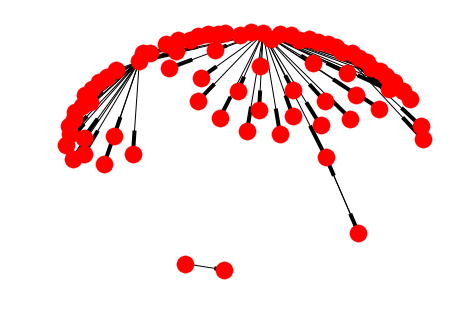

In [50]:
import networkx as nx
repos = first_k[first_k['w_id']==3795438593411753]
g = nx.from_pandas_dataframe(repos,source='from_id',target='repo_id',create_using=nx.DiGraph())
nx.draw(g)